In [11]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

In [52]:
df = pd.read_excel('Estonia evoting.xlsx',sheet_name='Tabelle2')
display(df)

,election_year,share_tot,Elligible voters,i-votes,share i-votes
0,2019,63.7,885417,155521,17.564718
1,2017,53.3,1100647,186034,16.902240
2,2015,64.2,899793,176491,19.614622
3,2014,36.5,902873,103151,11.424752
4,2013,58.0,1086935,133808,12.310580
5,2011,63.5,913346,140846,15.420881
6,2009,60.6,1094317,104413,9.541385
7,2007,61.9,897243,30275,3.374225
8,2005,47.4,1059292,9317,0.879550
9,2004,26.8,1,0,0.000000


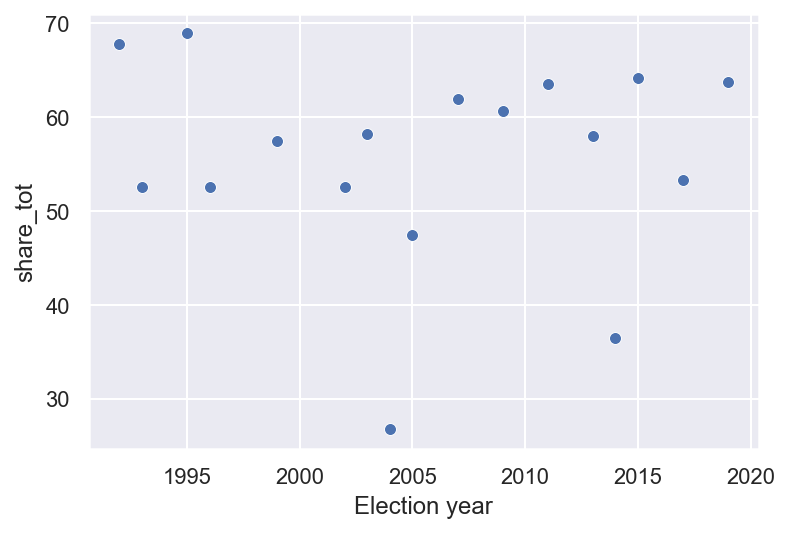

In [44]:
sns.scatterplot(data=df, x='Election year', y='share_tot')

In [72]:
rdd_L = df[df['election_year']<2005]
display(rdd_L)
rdd_R = df[df['election_year']>=2005]
display(rdd_R)

,election_year,share_tot,Elligible voters,i-votes,share i-votes
9,2004,26.8,1,0,0.0
10,2003,58.2,1,0,0.0
11,2002,52.5,1,0,0.0
12,1999,57.4,1,0,0.0
13,1996,52.5,1,0,0.0
14,1995,68.9,1,0,0.0
15,1993,52.6,1,0,0.0
16,1992,67.8,1,0,0.0


,election_year,share_tot,Elligible voters,i-votes,share i-votes
0,2019,63.7,885417,155521,17.564718
1,2017,53.3,1100647,186034,16.902240
2,2015,64.2,899793,176491,19.614622
3,2014,36.5,902873,103151,11.424752
4,2013,58.0,1086935,133808,12.310580
5,2011,63.5,913346,140846,15.420881
6,2009,60.6,1094317,104413,9.541385
7,2007,61.9,897243,30275,3.374225
8,2005,47.4,1059292,9317,0.879550


In [81]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

res = smf.ols("share_tot ~ election_year", data=rdd_L).fit()
p = res.params
display(p)
res2 = smf.ols("share_tot ~ election_year", data=rdd_R).fit()
p2 = res2.params
display(p2)
res_tot = smf.ols("share_tot ~ election_year", data=df).fit()
p_tot = res_tot.params
display(p_tot)

Intercept        3502.451974
election_year      -1.725658
dtype: float64

Intercept       -368.815026
election_year      0.211399
dtype: float64

Intercept        237.146501
election_year     -0.090505
dtype: float64

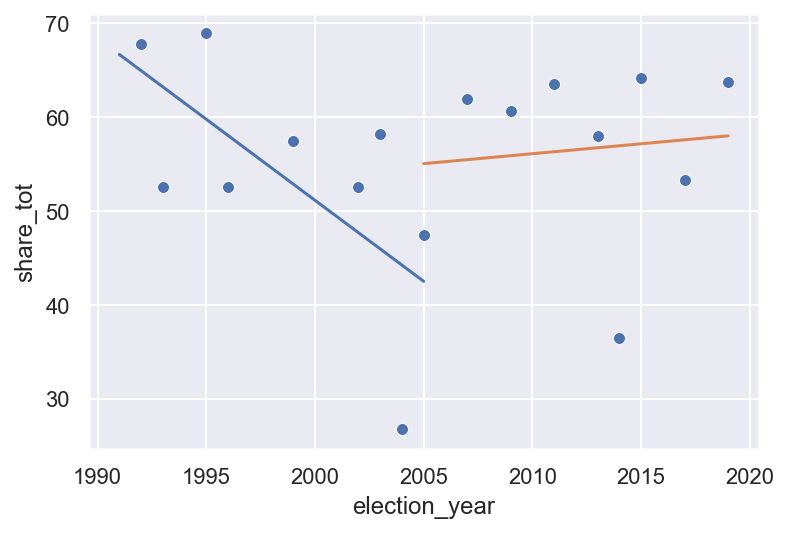

In [83]:
ax =sns.scatterplot(data=df, x='election_year', y='share_tot')
x_l = np.arange(1991, 2006)
x_r = np.arange(2005, 2020)
x_tot = np.arange(1991, 2020)
ax.plot(x_l,p.Intercept+p.election_year*x_l)
ax.plot(x_r,p2.Intercept+p2.election_year*x_r)
#ax.plot(x_tot,p_tot.Intercept+p_tot.election_year*x_tot)